In [172]:
import pandas as pd
import numpy as np

In [173]:
# 모든 컬럼을 출력하도록 설정
pd.set_option('display.max_columns', None)  # None으로 설정하면 모든 컬럼 출력 default:20
# 모든 행을 출력하도록 설정
pd.set_option('display.max_rows', 10)  # None으로 설정하면 모든 행 출력 default:50
# 모든 열의 최대 너비를 설정
pd.set_option('display.max_colwidth', None) # None으로 설정하면 모든 내용을 출력 default:60

In [174]:
import seaborn as sns
import matplotlib.pyplot as plt
import koreanize_matplotlib
from wordcloud import WordCloud

In [175]:
# 정규표현식
import re

In [176]:
# 날짜는 파이썬 표준라이브러리 datetime 사용
import datetime

In [177]:
# 오늘 날짜 구하기
today = datetime.datetime.today()
print(today)
today = today.strftime('%Y-%m-%d')
today

2025-01-06 16:21:21.155847


'2025-01-06'

In [178]:
df = pd.read_csv(f'../stock/news_preprocessed_{today}.csv')
df.head(1)

,언론사,제목,내용,작성일시,제목_길이,내용_길이,제목_토큰_개수,내용_토큰_개수,제목_명사,내용_명사
0,매일경제,"‘아자르 신화’ 안상일, 벤처 투자자 됐다… 알토스 합류","\n 신정환 카카오 전 CTO도 합류AI 기업 발굴·투자사 지원 강화 사진 확대 신정환 카카오 전 부사장(좌), 안상일 하이퍼커넥트 전 대표(우)가 알토스벤처스의 벤처파트너로 합류했다. 미국의 한국계 벤처캐피탈 알토스벤처스가 하이퍼커넥트 공동창업자인 안상일 전 대표를 벤처파트너로 영입했다고 6일 밝혔다. 카카오 전 기술최고책임자(CTO)를 역임한 신정환 전 부사장도 함께 합류했다.알토스벤처스는 두 벤처파트너와 함께 포트폴리오 기업 지원 역량을 강화하고, 인공지능(AI)과 첨단 기술 분야 유망 초기 기업 발굴에 박차를 가할 계획이다.신정환 파트너는 서울대 건축학과를 졸업한 후 NHN에서 소프트웨어 엔지니어로 경력을 시작했다. 이후 NHN 재팬 팀장과 NHN 비즈니스 플랫폼 부장을 거쳐 카카오 CTO를 맡았다. 신 파트너는 카카오 재직 기간 동안 카카오톡, 카카오스토리와 같은 주요 서비스 개선과 수익화를 성공적으로 수행했다.안상일 파트너는 서울대 재료공학부를 졸업한 후 연쇄창업가로서 6개의 스타트업을 창업했다. 2014년 하이퍼커넥트를 공동 창업해 글로벌 영상 채팅 플랫폼 아자르와 라이브 스트리밍 서비스 하쿠나라이브를 개발했다. 서비스를 전 세계 230개국에 확장하며 하이퍼커넥트를 세계적인 기업으로 성장시켰다.이후 안 파트너는 2021년 하이퍼커넥트를 미국 나스닥 상장사인 매치그룹에 2조원에 매각한 후 매치그룹 아시아태평양 최고혁신책임자(CIO)를 역임했다.신 파트너는 지난해 9월, 안 파트너는 같은 해 11월 알토스벤처스에 합류했다. 두 파트너는 포트폴리오 기업 기술·제품 개발과 운영 효율성 성장 전략 수립을 도울 예정이다.한편 알토스벤처스는 1996년 미국 실리콘밸리를 기반으로 설립된 벤처캐피털로, 2006년 한국 투자를 본격화했다. 크래프톤, 우아한형제들(배달의민족), 하이퍼커넥트, 비바리퍼블리카(토스), 당근마켓 등에 투자했다.\n",2025-01-06 09:44:38,31,938,8,188,아자르 신화 안상일 벤처 투자자 토스 합류,신정환 카카오 전 도 합류 기업 발굴 투자 사 지원 강화 사진 확대 신정환 카카오 전 부사 좌 안상 일 하이퍼 커넥트 전 대표 알토 스벤 처스 처 파트너 합류 미국 한국 벤처캐피탈 알토 스벤 처스 하이퍼 커넥트 창업 안상 일 전 대표 처 파트너 입 카카오 전 기술 최고 책임자 를 역임 신정환 전 부사 장도 합류 알토 스벤 처스 두 처 파트너 포트폴리오 기업 지원 역량 인공 지능 과 첨단 기술 분야 유망 초기 기업 발굴 박차 계획 신정환 파트너 서울대 건축학 졸업 후 소프트웨어 엔지니어 경력 시작 이후 재팬 팀 비즈니스 플랫폼 부장 카카오 를 신 파트너 카카오 재직 기간 동안 카카오 톡 카카오스토리 주요 서비스 개선 수익 성공 수행 안상 일 파트너 서울대 재료공학 졸업 후 연쇄 창업가 로서 개 스타트업 창업 하이퍼 커넥트 공동 창업 글로벌 영상 채팅 플랫폼 아자르 라이브 스트리밍 서비스 쿠나 라이브 개발 서비스 전 세계 개국 확장 하이퍼 커넥트 세계 기업 성장 이후 안 파트너 하이퍼 커넥트 미국 나스닥 상장 사인 매치 그룹 매각 후 매치 그룹 아시아 태평양 최고 혁신 책임자 를 역임 신 파트너 지난해 안 파트너 해 알토 스벤 처스 합류 두 파트너 포트폴리오 기업 기술 제품 개발 운영 효율 성장 전략 수립 도울 예정 한편 알토 스벤 처스 미국 실리콘밸리 기반 설립 벤처캐피털 한국 투자 본격 크래프톤 형제 배달 민족 하이퍼 커넥트 비바 리퍼 블 리카 토스 당근 마켓 등 투자


In [179]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   언론사       100 non-null    object
 1   제목        100 non-null    object
 2   내용        100 non-null    object
 3   작성일시      100 non-null    object
 4   제목_길이     100 non-null    int64 
 5   내용_길이     100 non-null    int64 
 6   제목_토큰_개수  100 non-null    int64 
 7   내용_토큰_개수  100 non-null    int64 
 8   제목_명사     100 non-null    object
 9   내용_명사     100 non-null    object
dtypes: int64(4), object(6)
memory usage: 7.9+ KB


In [180]:
df['제목']

0                 ‘아자르 신화’ 안상일, 벤처 투자자 됐다… 알토스 합류
1            메리츠증권, 美국채 실시간 거래 ‘미국채권 LIVE’ 서비스 시행
2          “삼성에스디에스, 이익률 개선 지연·성장 전략 구체화 기대”…목표가↓
3                    “파마리서치, 리쥬란은 불경기도 피해간다”…목표가↑
4     “한국선 콧대 높은 애플, 중국선 할인한다고?”…충격받은 주가 연초부터 뚝 뚝
                         ...                     
95                         "엔비디아 큰 거 온다"…하이닉스 기지개
96                   삼성SDS 주가 하락에…상장 앞둔 LG CNS 고심
97                    '전고체 배터리' ETF 올해 첫 출격…7일 상장
98             한국 증시, 드디어 '앞에서 1등'…외국인들 쓸어 담은 종목이
99                 주식 거래수수료 전면 무료…메리츠證 예탁자산 3조 돌파
Name: 제목, Length: 100, dtype: object

In [181]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer

In [299]:
cvect = CountVectorizer()
cvect_dtm = cvect.fit_transform(df['내용_명사'])
cvect_dtm

<100x3465 sparse matrix of type '<class 'numpy.int64'>'
	with 12364 stored elements in Compressed Sparse Row format>

In [300]:
tvect = TfidfVectorizer()
tvect_dtm = tvect.fit_transform(df['내용_명사'])
tvect_dtm

<100x3465 sparse matrix of type '<class 'numpy.float64'>'
	with 12364 stored elements in Compressed Sparse Row format>

In [301]:
cvect_dtm.toarray(), tvect_dtm.toarray()

(array([[0, 0, 0, ..., 0, 0, 0],
        [0, 1, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 1, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=int64),
 array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.        , 0.0611918 , 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        ...,
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.        , 0.        , 0.04250845, ..., 0.        , 0.        ,
         0.        ],
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ]]))

In [302]:
cvect.get_feature_names_out()

array(['가가', '가격', '가까이', ..., '희비', '히트', '힐튼'], dtype=object)

In [303]:
df_cvect_dtm = pd.DataFrame(cvect_dtm.toarray(),columns=cvect.get_feature_names_out())
df_tvect_dtm = pd.DataFrame(tvect_dtm.toarray(),columns=tvect.get_feature_names_out())

In [304]:
df_cvect_dtm.shape, df_tvect_dtm.shape

((100, 3465), (100, 3465))

<Axes: title={'center': 'BOW'}>

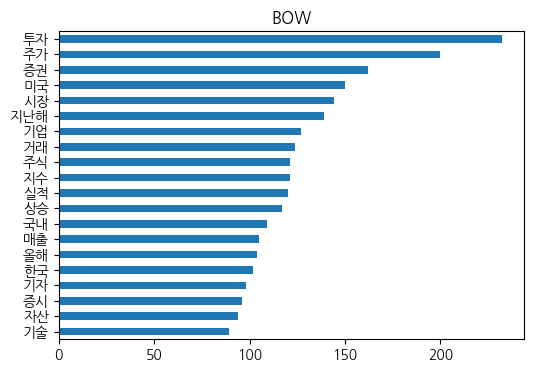

In [305]:
df_cvect_dtm.sum().nlargest(20).sort_values(ascending=True).plot.barh(title='BOW',figsize=(6,4))

<Axes: title={'center': 'TF-IDF 가중치 합'}>

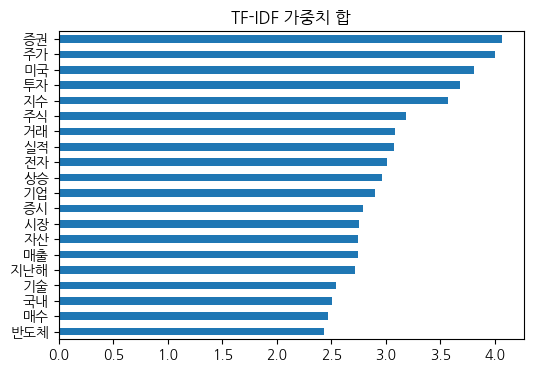

In [306]:
df_tvect_dtm.sum().nlargest(20).sort_values(ascending=True).plot.barh(title='TF-IDF 가중치 합',figsize=(6,4))

In [307]:
def display_word_cloud(dict, max_words=30, width=1200, height=600) :
    font_path = r'C:\Windows\Fonts\malgun.ttf'
    stopwords = ['코스피','코스닥','종목','ETF','주식','주가','상승','하락','상장','투자','서학','동학','기업','시장'
                 '시총','목표가','올해','내년','국내','해외','외국인','소식에','기대감','한국','증시']
    word_cloud = WordCloud(font_path=font_path, 
                      width=width, 
                      height=height,
                      stopwords=stopwords,
                      background_color='white',
                      max_words = max_words,
                      min_word_length = 2,
                      random_state=2024
                    ).generate_from_frequencies(dict)
    plt.figure(figsize=(6, 4))    
    plt.imshow(word_cloud,interpolation='bilinear')
    plt.axis("off")
    plt.show()
    return word_cloud

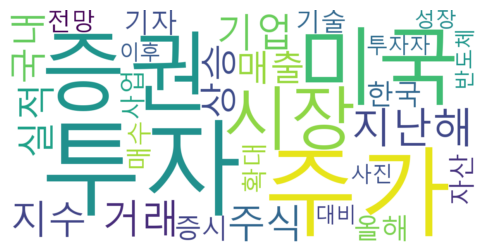

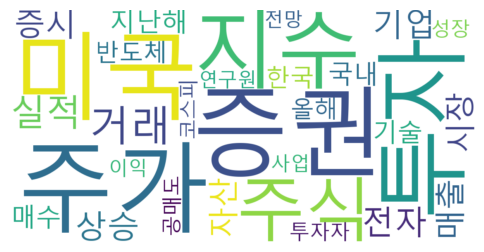

In [308]:
display_word_cloud(df_cvect_dtm.sum().nlargest(30).to_dict())
display_word_cloud(df_tvect_dtm.sum().nlargest(30).to_dict())

#### LDA(LatentDirichletAllocation) 토픽모델링

 - W : 문서-주제 행렬 (100,4)
 - H : 주제-단어 행렬 (4,409) 

https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.LatentDirichletAllocation.html

In [309]:
from sklearn.decomposition import LatentDirichletAllocation

In [310]:
# n_components : 주제수
# 문서 X 주제
n_components = 3
LDA_model = LatentDirichletAllocation(n_components=n_components, random_state=2025)
cvect_W = LDA_model.fit_transform(df_tvect_dtm)
print(cvect_W.shape)
cvect_W

(100, 3)


array([[0.04260513, 0.48757874, 0.46981613],
       [0.0443684 , 0.04430417, 0.91132743],
       [0.03840416, 0.03837477, 0.92322107],
       [0.0486297 , 0.04863938, 0.90273092],
       [0.03461924, 0.03462048, 0.93076028],
       [0.85951808, 0.06190582, 0.0785761 ],
       [0.03399896, 0.03399516, 0.93200587],
       [0.03448341, 0.03447899, 0.9310376 ],
       [0.03914921, 0.03911562, 0.92173517],
       [0.03627548, 0.03628155, 0.92744297],
       [0.0380973 , 0.03810212, 0.92380058],
       [0.04073917, 0.04076492, 0.91849591],
       [0.05112966, 0.0511315 , 0.89773884],
       [0.03738181, 0.03733431, 0.92528389],
       [0.03231365, 0.03231091, 0.93537544],
       [0.03191785, 0.0319175 , 0.93616465],
       [0.03080612, 0.03081655, 0.93837733],
       [0.03955106, 0.03956135, 0.92088759],
       [0.03555099, 0.03551981, 0.9289292 ],
       [0.0438244 , 0.04376612, 0.91240948],
       [0.03925509, 0.03909389, 0.92165102],
       [0.04249068, 0.03749969, 0.92000963],
       [0.

In [311]:
# 문서의 주제 확률값의 합은 1
cvect_W.sum(axis=1)

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [312]:
# 주제 X 단어
cvect_H = LDA_model.components_
print(cvect_H.shape)
cvect_H

(3, 3465)


array([[0.33384111, 0.3337962 , 0.33409603, ..., 0.33347874, 0.33343043,
        0.33357417],
       [0.33384652, 0.33403784, 0.3341064 , ..., 0.33348053, 0.33343173,
        0.33357673],
       [0.72767745, 1.35079913, 0.61643665, ..., 0.36150036, 0.35716877,
        0.38616707]])

In [313]:
# 문서 X 주제 데이터프레임
df_cvect_W = pd.DataFrame(cvect_W)
df_cvect_W['제목'] = df['제목']
df_cvect_W['제목_명사'] = df['제목_명사']
df_cvect_W

,0,1,2,제목,제목_명사
0,0.042605,0.487579,0.469816,"‘아자르 신화’ 안상일, 벤처 투자자 됐다… 알토스 합류",아자르 신화 안상일 벤처 투자자 토스 합류
1,0.044368,0.044304,0.911327,"메리츠증권, 美국채 실시간 거래 ‘미국채권 LIVE’ 서비스 시행",메리 증권 美 국채 실시간 거래 미국 채권 서비스 시행
2,0.038404,0.038375,0.923221,"“삼성에스디에스, 이익률 개선 지연·성장 전략 구체화 기대”…목표가↓",삼성 에스 이익 개선 지연 성장 전략 구체 기대 목표
3,0.048630,0.048639,0.902731,"“파마리서치, 리쥬란은 불경기도 피해간다”…목표가↑",파마 리서치 리쥬 불경기 목표
4,0.034619,0.034620,0.930760,"“한국선 콧대 높은 애플, 중국선 할인한다고?”…충격받은 주가 연초부터 뚝 뚝",한국선 콧대 애플 중국 선 할인 충격 주가 연초
...,...,...,...,...,...
95,0.035188,0.035144,0.929668,"""엔비디아 큰 거 온다""…하이닉스 기지개",비디아 거 하이닉스 기지개
96,0.038275,0.038252,0.923474,삼성SDS 주가 하락에…상장 앞둔 LG CNS 고심,삼성 주가 하락 상장 고심
97,0.045777,0.045771,0.908452,'전고체 배터리' ETF 올해 첫 출격…7일 상장,고체 배터리 올해 출격 일 상장
98,0.029420,0.029428,0.941152,"한국 증시, 드디어 '앞에서 1등'…외국인들 쓸어 담은 종목이",한국 증시 앞 등 외국인 종목


In [314]:
# 1번 주제 확률이 높은 상위 5개 문서 보기
df_cvect_W.sort_values(by=1,ascending=False).head(5)

,0,1,2,제목,제목_명사
0,0.042605,0.487579,0.469816,"‘아자르 신화’ 안상일, 벤처 투자자 됐다… 알토스 합류",아자르 신화 안상일 벤처 투자자 토스 합류
46,0.093312,0.093130,0.813558,[인사] 한국거래소,인사 한국거래소
57,0.278076,0.065071,0.656853,국내 사모펀드에 팔리는 마녀공장…26% 급등,국내 사모 펀드 마녀 공장 급등
86,0.063573,0.063599,0.872828,비트코인 9.8만달러 재돌파…마이크로스트래티지 13% '급등',비트코인 만 달러 돌파 마이크 로스 트래 티지 급등
30,0.063545,0.063501,0.872954,무신사 몸값 3조 등극,신사 몸값 조 등 극


In [315]:
# 주제 X 단어
df_cvect_lda_topic = pd.DataFrame(cvect_H, columns=cvect.get_feature_names_out())
df_cvect_lda_topic

가가        가격       가까이        가능       가능성        가도        가동  \
0  0.333841  0.333796  0.334096  0.333886  0.334958  0.333817  0.333946   
1  0.333847  0.334038  0.334106  0.333892  0.333801  0.333824  0.337680   
2  0.727677  1.350799  0.616437  0.478712  1.526206  0.476558  0.522218   

         가량        가로        가맹        가상      가상현실        가세        가속  \
0  0.334037  0.423800  0.333611  0.333809  0.333479  0.333800  0.333835   
1  0.336460  0.334556  0.333617  0.333814  0.333481  0.333806  0.333841   
2  0.641458  0.382477  0.385665  0.522741  0.361500  0.403351  0.905719   

         가수        가스        가시        가액       가양동        가온       가운데  \
0  0.333652  0.333836  0.333881  0.334000  0.333574  0.333952  0.333885   
1  0.333656  0.333837  0.333886  0.334006  0.333577  0.333954  0.334164   
2  0.382616  0.510355  0.555519  0.588195  0.386167  0.409768  1.124634   

         가의      가이던스       가이드      가이드북        가입        가장        가전  \
0  0.333816  0.333663  0.333849  0.333923  0.333416  0.333860  0.333839   
1  0.333823  0.333667  0.333856  0.333929  0.333416  0.334041  0.333845   
2  0.465477  0.518727  0.706585  0.440626  0.347185  1.503884  0.845970   

         가정        가중        가지        가짜        가치       가치주      가톨릭대  \
0  0.333762  0.333652  0.333851  0.333416  0.333893  0.333766  0.364385   
1  0.333767  0.333656  0.333859  0.333416  0.333866  0.333770  0.333558   
2  0.506947  0.382616  0.535012  0.347185  1.565333  0.381429  0.334182   

        가파르       가파른        각각        각광        각도        각성        각오  \
0  0.333980  0.333875  0.333868  0.333668  0.364385  0.333543  0.333491   
1  0.333987  0.333882  0.333875  0.333672  0.333558  0.339569  0.333493   
2  0.509683  0.439723  1.277180  0.413521  0.334182  0.347173  0.356889   

         간담        간만       간문제        간접        갈등        갈릴       갈수록  \
0  0.333727  0.333607  0.333480  0.333878  0.333966  0.333479  0.333616   
1  0.333733  0.333611  0.333479  0.333885  0.333866  0.333481  0.333619   
2  0.404733  0.406640  0.361076  0.483809  0.502447  0.361500  0.365341   

         감당        감독        감사        감세        감소        감수       감수성  \
0  0.333562  0.333926  0.555706  0.333430  0.333806  0.333591  0.333430   
1  0.333565  0.333602  0.333855  0.333432  0.334138  0.333595  0.333432   
2  0.373669  0.359869  0.335315  0.357169  1.165185  0.391732  0.357169   

         감시       감시인        감안        감원        감익        감자        감정  \
0  0.333750  0.333616  0.333768  0.333479  0.333574  0.438051  0.334510   
1  0.333754  0.333619  0.333774  0.333481  0.333577  0.334644  0.333808   
2  0.414332  0.365341  0.551015  0.361500  0.386167  0.408364  0.386476   

        감정인      감정평가     감정평가사        감축       감평협       갑자기        강관  \
0  0.333926  0.363755  0.337554  0.333851  0.333926  0.333430  0.333574   
1  0.333602  0.335656  0.334361  0.333856  0.333602  0.333432  0.333577   
2  0.359869  0.766337  0.492467  0.675791  0.359869  0.357169  0.386167   

         강남       강남구        강도        강보        강사       강성원        강세  \
0  0.333792  0.333826  0.333806  0.333845  0.334014  0.395895  0.333852   
1  0.333796  0.333830  0.333811  0.333850  0.334017  0.333686  0.333859   
2  0.421426  0.448671  0.561938  0.510975  0.449657  0.334669  1.273415   

         강연        강재        강점        강제        강조        강주       강진규  \
0  0.334177  0.333574  0.337863  0.333906  0.348800  0.333416  0.333727   
1  0.334168  0.333577  0.333836  0.333712  0.333971  0.333416  0.333733   
2  0.628471  0.386167  0.465528  0.411585  0.947325  0.347185  0.404733   

        강해진        강화       개개인        개국        개념        개막        개미  \
0  0.333709  0.333941  0.333766  0.345378  0.333773  0.333886  0.333836   
1  0.333714  0.343265  0.333773  0.349713  0.333779  0.333893  0.333843   
2  0.427626  0.714445  0.412760  0.583437  0.403083  0.671005  0.812126   

         개발       개발자        개별        개보        개사        개선        개설  \
0  0.336201  0.333652

In [316]:
# 첫번째 주제와 연관성 있는 상위 30개 단어
df_cvect_lda_topic.loc[0].nlargest(30)

마녀     1.646077
공장     1.255285
학술     0.941277
대학     0.802913
교수     0.714298
         ...   
자의     0.479301
논문     0.477940
계약     0.474956
잠재력    0.470032
누구     0.470030
Name: 0, Length: 30, dtype: float64

<Axes: >

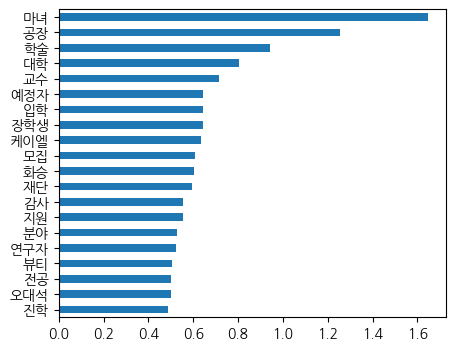

In [317]:
# 첫번째 주제와 연관성 있는 상위 20개 단어 - 시각화(바차트)
df_cvect_lda_topic.loc[0].nlargest(20).sort_values(ascending=True).plot.barh(figsize=(5,4))

In [318]:
# 주제별로 상위 키워드를 막대그래프로 시각화합니다.
# model - LDA모델
# feature_names - 단어
# n_top_words - 주제와 연관된 상위 단어
# title - 그래프 제목 
# n_topics - 주제 수
def plot_top_words(model, feature_names, n_top_words, title, n_topics=5):    
    
    df_topic = pd.DataFrame(model.components_, columns=feature_names)
    
    fig, axes = plt.subplots(1, n_topics, figsize=(4 * n_topics, 12), sharex=True)
    axes = axes.flatten()

    for topic_idx in df_topic.index:
        ax = axes[topic_idx]
        df_topic.loc[topic_idx].nlargest(n_top_words).plot.barh(ax=ax)
        ax.invert_yaxis()
        ax.set_title(f"Topic {topic_idx + 1}", fontdict={"fontsize": 20})
        ax.tick_params(axis="both", which="major", labelsize=15)
        for i in "top right".split():
            ax.spines[i].set_visible(False)

        fig.suptitle(title, fontsize=30)
        plt.subplots_adjust(top=0.90, bottom=0.05, wspace=0.90, hspace=0.3)

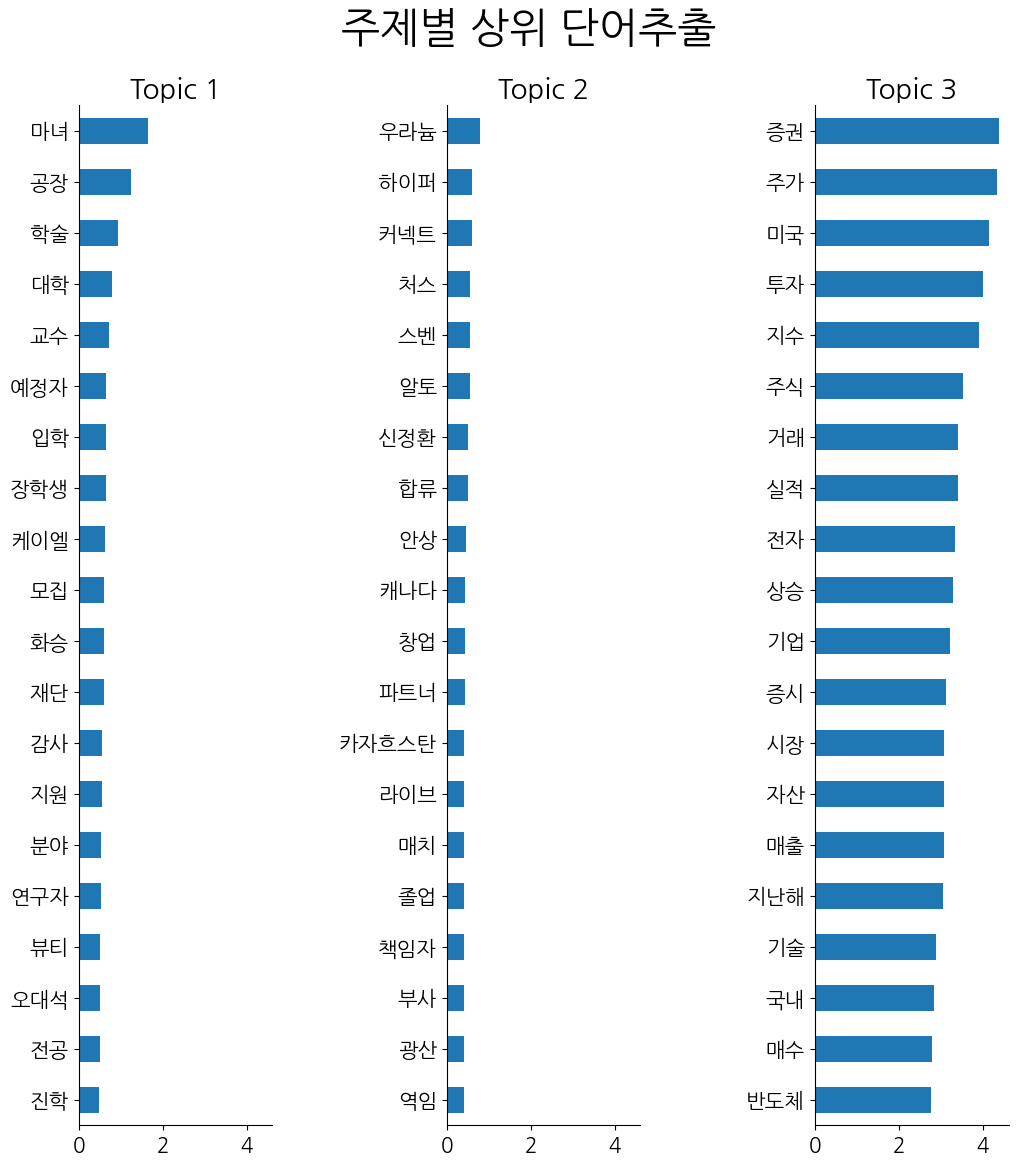

In [319]:
plot_top_words(LDA_model,cvect.get_feature_names_out(),20,'주제별 상위 단어추출',n_components)

In [296]:
df_cvect_lda_topic.loc[0]

主食     0.994717
가치     0.334357
강남     0.334294
강보합    0.738806
강세     0.672517
         ...   
환율     0.335022
환호     0.736556
회복     0.669449
회의록    0.334657
훈풍     0.853261
Name: 0, Length: 409, dtype: float64

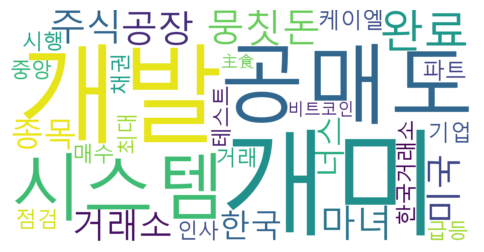

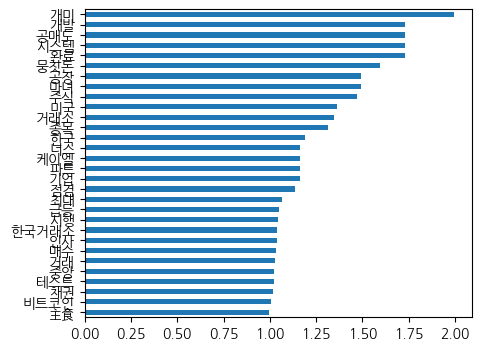

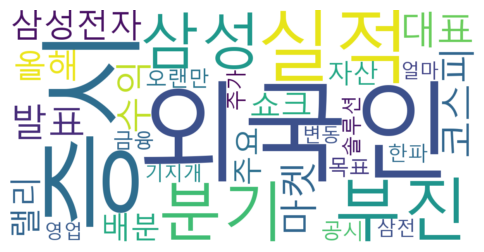

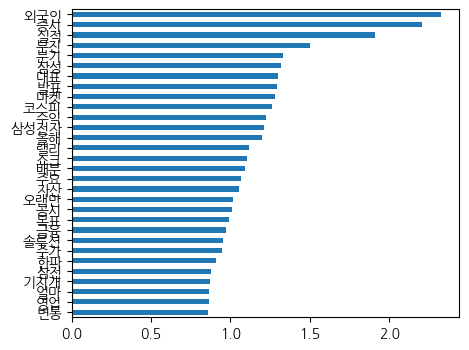

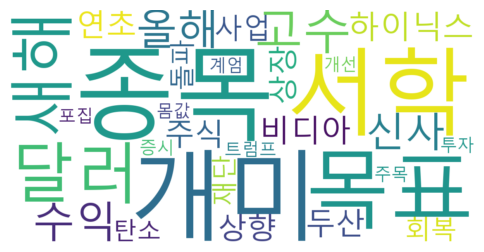

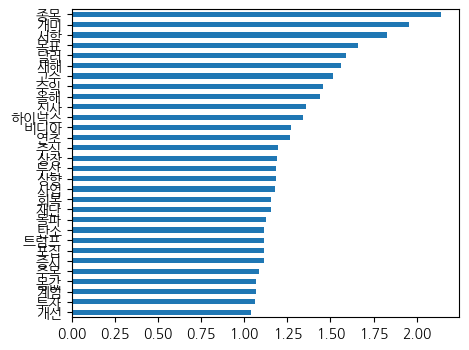

In [298]:
for idx in range(n_components) :
    display_word_cloud(df_cvect_lda_topic.loc[idx].to_dict(),30)
    df_cvect_lda_topic.loc[idx].nlargest(30).sort_values(ascending=True).plot.barh(figsize=(5,4))